## Unit 7 | Assignment - Distinguishing Sentiments

## Background

__Twitter__ has become a wildly sprawling jungle of information&mdash;140 characters at a time. Somewhere between 350 million and 500 million tweets are estimated to be sent out _per day_. With such an explosion of data, on Twitter and elsewhere, it becomes more important than ever to tame it in some way, to concisely capture the essence of the data.

Choose __one__ of the following two assignments, in which you will do just that. Good luck!

## News Mood

In this assignment, you'll create a Python script to perform a sentiment analysis of the Twitter activity of various news oulets, and to present your findings visually.

Your final output should provide a visualized summary of the sentiments expressed in Tweets sent out by the following news organizations: __BBC, CBS, CNN, Fox, and New York times__.

![output_10_0.png](output_10_0.png)

![output_13_1.png](output_13_1.png)

The first plot will be and/or feature the following:

* Be a scatter plot of sentiments of the last __100__ tweets sent out by each news organization, ranging from -1.0 to 1.0, where a score of 0 expresses a neutral sentiment, -1 the most negative sentiment possible, and +1 the most positive sentiment possible.
* Each plot point will reflect the _compound_ sentiment of a tweet.
* Sort each plot point by its relative timestamp.

The second plot will be a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization. For this plot, you will again aggregate the compound sentiments analyzed by VADER.

The tools of the trade you will need for your task as a data analyst include the following: tweepy, pandas, matplotlib, and VADER.

Your final Jupyter notebook must:

* Pull last 100 tweets from each outlet.
* Perform a sentiment analysis with the compound, positive, neutral, and negative scoring for each tweet. 
* Pull into a DataFrame the tweet's source acount, its text, its date, and its compound, positive, neutral, and negative sentiment scores.
* Export the data in the DataFrame into a CSV file.
* Save PNG images for each plot.

As final considerations:

* Use the Matplotlib libraries.
* Include a written description of three observable trends based on the data. 
* Include proper labeling of your plots, including plot titles (with date of analysis) and axes labels.
* Include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  


## PlotBot

In this activity, more challenging than the last, you will build a Twitter bot that sends out visualized sentiment analysis of a Twitter account's recent tweets.

Visit [https://twitter.com/PlotBot5](https://twitter.com/PlotBot5) for an example of what your script should do.

The bot receives tweets via mentions and in turn performs sentiment analysis on the most recent twitter account specified in the mention 

For example, when a user tweets, __"@PlotBot Analyze: @CNN,"__ it will trigger a sentiment analysis on the CNN twitter feed. 

A plot from the sentiment analysis is then tweeted to the PlotBot5 twitter feed. See below for examples of scatter plots you will generate:

![@juanitasoranno.png](@juanitasoranno.png)
![@nancypwong.png](@nancypwong.png)
![nytimes.png](nytimes.png)


Hints, requirements, and considerations:

* Your bot should scan your account every __five minutes__ for mentions.
* Your bot should pull 500 most recent tweets to analyze for each incoming request.
* Your script should prevent abuse by analyzing __only__ Twitter accounts that have not previously been analyzed.
* Your plot should include meaningful legend and labels.
* It should also mention the Twitter account name of the requesting user.
* When submitting your assignment, be sure to have at least __three__ analyses tweeted out from your account (enlist the help of classmates, friends, or family, if necessary!).
* Notable libraries used to complete this application include: Matplotlib, Pandas, Tweepy, and VADER.
* You may find it helpful to organize your code in function(s), then call them.
* If you're not yet familiar with creating functions in Python, here is a tutorial you may wish to consult: [https://www.tutorialspoint.com/python/python_functions.htm](https://www.tutorialspoint.com/python/python_functions.htm).



## Copyright

Coding Boot Camp (C) 2017. All Rights Reserved.


# Observations
1. CBS seems to be the most positive twitter account of those examined
2. Recency of tweets does not seem to have an affect on sentiment, all news outlets seem to have both positive and negative tweets regardless of recency
3. A majority of tweets seem to be neutral sentiment, suggesting they are generally informative in nature, which should be expected for news outlets (although it is not always the case).

In [2]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use("dark_background")

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

#Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

GRABBING TWEETS FROM @CNN!
GRABBING TWEETS FROM @BBC!
GRABBING TWEETS FROM @Fox!
GRABBING TWEETS FROM @nytimes!
GRABBING TWEETS FROM @CBS!


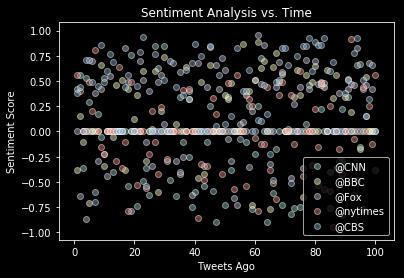

In [3]:
# Target Account
target_users = ["@CNN", "@BBC", "@Fox", "@nytimes","@CBS"]
oldest_tweet = None
for user in target_users:
    print(f"GRABBING TWEETS FROM {user}!")
    # Counter
    counter = 1

    # Variables for holding sentiments
    sentiments = []

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        
       # print(f"PAGE NUMBER {x}!")

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, max_id = oldest_tweet)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
            sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        #    print(f"tweet number {counter}")

            # Add to counter 
            counter = counter + 1
            oldest_tweet = int(tweet["id_str"]) - 1
        
    sentiments_df = pd.DataFrame.from_dict(sentiments)
    
    plt.scatter(sentiments_df["Tweets Ago"],sentiments_df["Compound"],
                label = f"{user}",
                alpha = 0.75,
                edgecolor = "white")
    plt.xlabel("Tweets Ago")
    plt.ylabel("Sentiment Score")
    plt.title("Sentiment Analysis vs. Time")

    plt.legend()
plt.save_fig("Sentiment Analysis vs Time")
plt.show()

GRABBING TWEETS FROM @CNN!
GRABBING TWEETS FROM @BBC!
GRABBING TWEETS FROM @Fox!
GRABBING TWEETS FROM @nytimes!
GRABBING TWEETS FROM @CBS!


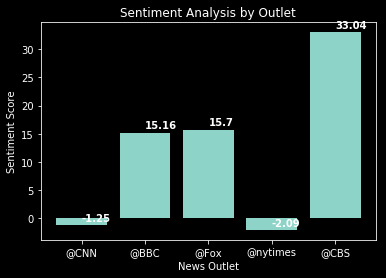

In [27]:
target_users = ["@CNN", "@BBC", "@Fox", "@nytimes","@CBS"]
oldest_tweet = None
aggregates = []
for user in target_users:
    print(f"GRABBING TWEETS FROM {user}!")
    # Counter
    counter = 1

    # Variables for holding sentiments
    sentiments = []

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(5):
        
       # print(f"PAGE NUMBER {x}!")

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, max_id = oldest_tweet)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter
            sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
            #print(f"tweet number {counter}")

            # Add to counter 
            counter = counter + 1
            oldest_tweet = int(tweet["id_str"]) - 1
        
    sentiments_df = pd.DataFrame.from_dict(sentiments)
    #print(sentiments_df)
    aggregates.append(sentiments_df["Compound"].sum())
y_pos = np.arange(len(target_users))
plt.bar(y_pos,aggregates)
            #label = f"{user}")
            #edgecolor = "white")
plt.xticks(y_pos,target_users)
plt.xlabel("News Outlet")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Analysis by Outlet")
for i, v in enumerate(aggregates):
    plt.text(i, v + .75, str(round(v,2)), color='white', fontweight='bold')
plt.legend()
plt.save_fig("Sentiment Analysis by Outlet")
plt.show()